In [3250]:
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


In [3251]:


# W and H values (H = W)
W_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# NP values per density
np_values_by_density = {
    "density_01": [30, 120, 750, 3000, 12000, 75000, 300000, 1200000, 2700000, 4800000,7500000,10800000,14700000, 19200000, 24300000, 30000000],
    "density_05": [150, 600, 3750, 15000, 60000, 375000, 1500000, 6000000, 13500000, 24000000, 37500000, 54000000, 73500000, 96000000, 121500000, 150000000],
    "density_09": [270, 1080, 6750, 27000, 108000, 675000, 2700000, 10800000, 24300000, 43200000, 67500000, 97200000, 132300000, 172800000, 218700000, 270000000]
}


# **CUDA**

### 128


In [3252]:

root_dir128 = "./test_cuda/128/"

all_runtimes128 = defaultdict(lambda: defaultdict(list))

for density_folder, NP_values in np_values_by_density.items():
    density_path = os.path.join(root_dir128, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes128[density_folder][result_folder] = runtimes

avg_runtimes128 = defaultdict(dict)

for density, results in all_runtimes128.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes128[density][result_folder] = avg
        else:
            avg_runtimes128[density][result_folder] = None  

print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes128.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.2f} ms" if avg is not None else f"  {result_folder}: No data")



=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 161.10 ms
  results_W20_NP120: 161.70 ms
  results_W50_NP750: 166.40 ms
  results_W100_NP3000: 192.40 ms
  results_W200_NP12000: 142.70 ms
  results_W500_NP75000: 212.60 ms
  results_W1000_NP300000: 252.60 ms
  results_W2000_NP1200000: 467.50 ms
  results_W3000_NP2700000: 721.80 ms
  results_W4000_NP4800000: 1122.00 ms
  results_W5000_NP7500000: 1682.00 ms
  results_W6000_NP10800000: 2284.70 ms
  results_W7000_NP14700000: 3092.70 ms
  results_W8000_NP19200000: 4569.90 ms
  results_W9000_NP24300000: 5008.50 ms
  results_W10000_NP30000000: 6289.60 ms

density_05:
  results_W10_NP150: 158.00 ms
  results_W20_NP600: 170.50 ms
  results_W50_NP3750: 174.30 ms
  results_W100_NP15000: 169.00 ms
  results_W200_NP60000: 161.50 ms
  results_W500_NP375000: 245.90 ms
  results_W1000_NP1500000: 456.60 ms
  results_W2000_NP6000000: 1348.80 ms
  results_W3000_NP13500000: 2856.10 ms
  results_W4000_NP24000000: 4929.50 ms
  results_W5000_NP

In [3253]:
avg_vectors128 = {}

for density in ["density_01", "density_05", "density_09"]:
    NP_values = np_values_by_density[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    avg_vector = [avg_runtimes128[density].get(folder) for folder in result_folders]
    avg_vectors128[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors128.items():
    print(f"{density}:")
    print(vector)



=== Average Runtime Vectors (ms) ===
density_01:
[161.1, 161.7, 166.4, 192.4, 142.7, 212.6, 252.6, 467.5, 721.8, 1122.0, 1682.0, 2284.7, 3092.7, 4569.9, 5008.5, 6289.6]
density_05:
[158.0, 170.5, 174.3, 169.0, 161.5, 245.9, 456.6, 1348.8, 2856.1, 4929.5, 7634.2, 10923.7, 14839.9, 20511.4, 25335.9, 31095.5]
density_09:
[155.4, 162.2, 194.8, 174.0, 182.9, 230.9, 694.9, 2623.4, 5804.7, 10250.7, 15980.8, 22913.5, 30016.0, 43261.6, 49222.9, 66344.5]


### 256

In [3254]:
root_dir256 = "./test_cuda/256/"
all_runtimes256 = defaultdict(lambda: defaultdict(list))

for density_folder, NP_values in np_values_by_density.items():
    density_path = os.path.join(root_dir256, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  # run1.out to run10.out
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes256[density_folder][result_folder] = runtimes

avg_runtimes256 = defaultdict(dict)

for density, results in all_runtimes256.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes256[density][result_folder] = avg
        else:
            avg_runtimes256[density][result_folder] = None  # Or float('nan')

print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes256.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.2f} ms" if avg is not None else f"  {result_folder}: No data")



=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 211.70 ms
  results_W20_NP120: 189.80 ms
  results_W50_NP750: 192.50 ms
  results_W100_NP3000: 170.70 ms
  results_W200_NP12000: 182.90 ms
  results_W500_NP75000: 252.20 ms
  results_W1000_NP300000: 280.40 ms
  results_W2000_NP1200000: 472.90 ms
  results_W3000_NP2700000: 747.40 ms
  results_W4000_NP4800000: 1149.70 ms
  results_W5000_NP7500000: 1713.80 ms
  results_W6000_NP10800000: 2301.00 ms
  results_W7000_NP14700000: 3122.60 ms
  results_W8000_NP19200000: 4429.50 ms
  results_W9000_NP24300000: 5018.60 ms
  results_W10000_NP30000000: 6416.80 ms

density_05:
  results_W10_NP150: 195.30 ms
  results_W20_NP600: 185.00 ms
  results_W50_NP3750: 176.90 ms
  results_W100_NP15000: 171.30 ms
  results_W200_NP60000: 190.00 ms
  results_W500_NP375000: 270.00 ms
  results_W1000_NP1500000: 475.60 ms
  results_W2000_NP6000000: 1360.00 ms
  results_W3000_NP13500000: 2848.60 ms
  results_W4000_NP24000000: 4967.20 ms
  results_W5000_NP

In [3255]:

print("\n Runtime (ms) ", all_runtimes256['density_09']['results_W200_NP108000'])


 Runtime (ms)  [610, 151, 150, 150, 158, 156, 158, 157, 156, 157]


In [3256]:
avg_vectors256 = {}

for density in ["density_01", "density_05", "density_09"]:
    NP_values = np_values_by_density[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    avg_vector = [avg_runtimes256[density].get(folder) for folder in result_folders]
    avg_vectors256[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors256.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[211.7, 189.8, 192.5, 170.7, 182.9, 252.2, 280.4, 472.9, 747.4, 1149.7, 1713.8, 2301.0, 3122.6, 4429.5, 5018.6, 6416.8]
density_05:
[195.3, 185.0, 176.9, 171.3, 190.0, 270.0, 475.6, 1360.0, 2848.6, 4967.2, 7680.9, 10930.1, 14822.5, 21018.0, 24313.8, 31035.1]
density_09:
[190.4, 175.6, 191.1, 170.9, 200.3, 232.8, 674.3, 2525.2, 5596.9, 9833.5, 15350.2, 22004.3, 29918.6, 40913.8, 49236.3, 65272.8]


## 1024

In [3257]:
root_dir1024 = "./test_cuda/1024/"
all_runtimes1024 = defaultdict(lambda: defaultdict(list))

for density_folder, NP_values in np_values_by_density.items():
    density_path = os.path.join(root_dir1024, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  # run1.out to run10.out
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes1024[density_folder][result_folder] = runtimes

avg_runtimes1024 = defaultdict(dict)

for density, results in all_runtimes1024.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes1024[density][result_folder] = avg
        else:
            avg_runtimes1024[density][result_folder] = None

print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes1024.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.2f} ms" if avg is not None else f"  {result_folder}: No data")



=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 190.90 ms
  results_W20_NP120: 169.50 ms
  results_W50_NP750: 136.60 ms
  results_W100_NP3000: 155.40 ms
  results_W200_NP12000: 163.90 ms
  results_W500_NP75000: 286.90 ms
  results_W1000_NP300000: 256.90 ms
  results_W2000_NP1200000: 423.20 ms
  results_W3000_NP2700000: 661.80 ms
  results_W4000_NP4800000: 1041.30 ms
  results_W5000_NP7500000: 1547.10 ms
  results_W6000_NP10800000: 2120.80 ms
  results_W7000_NP14700000: 2982.40 ms
  results_W8000_NP19200000: 3952.10 ms
  results_W9000_NP24300000: 4782.10 ms
  results_W10000_NP30000000: 5579.60 ms

density_05:
  results_W10_NP150: 191.30 ms
  results_W20_NP600: 133.80 ms
  results_W50_NP3750: 134.90 ms
  results_W100_NP15000: 150.20 ms
  results_W200_NP60000: 186.90 ms
  results_W500_NP375000: 308.00 ms
  results_W1000_NP1500000: 459.80 ms
  results_W2000_NP6000000: 1200.90 ms
  results_W3000_NP13500000: 2583.50 ms
  results_W4000_NP24000000: 4630.50 ms
  results_W5000_NP

In [3258]:
avg_vectors1024 = {}

for density in ["density_01", "density_05", "density_09"]:
    NP_values = np_values_by_density[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    avg_vector = [avg_runtimes1024[density].get(folder) for folder in result_folders]
    avg_vectors1024[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors1024.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[190.9, 169.5, 136.6, 155.4, 163.9, 286.9, 256.9, 423.2, 661.8, 1041.3, 1547.1, 2120.8, 2982.4, 3952.1, 4782.1, 5579.6]
density_05:
[191.3, 133.8, 134.9, 150.2, 186.9, 308.0, 459.8, 1200.9, 2583.5, 4630.5, 7124.1, 10176.4, 14280.2, 18272.7, 23353.8, 27916.4]
density_09:
[159.5, 140.0, 134.4, 157.2, 181.0, 277.6, 549.6, 2380.2, 5356.3, 9481.0, 14811.0, 20596.6, 28935.2, 36888.3, 47486.4, 56956.1]


# **Serial Hactar**

In [3259]:
root_dirSerial = "./test_serial/"
all_runtimesSerial = defaultdict(lambda: defaultdict(list))

for density_folder, NP_values in np_values_by_density.items():
    density_path = os.path.join(root_dirSerial, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  # run1.out to run10.out
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimesSerial[density_folder][result_folder] = runtimes

avg_runtimesSerial = defaultdict(dict)

for density, results in all_runtimesSerial.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimesSerial[density][result_folder] = avg
        else:
            avg_runtimesSerial[density][result_folder] = None  

print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimesSerial.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.2f} ms" if avg is not None else f"  {result_folder}: No data")



=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 1024.60 ms
  results_W20_NP120: 74.70 ms
  results_W50_NP750: 1025.30 ms
  results_W100_NP3000: 79.50 ms
  results_W200_NP12000: 1069.90 ms
  results_W500_NP75000: 936.10 ms
  results_W1000_NP300000: 3264.60 ms
  results_W2000_NP1200000: 12862.90 ms
  results_W3000_NP2700000: 31525.80 ms
  results_W4000_NP4800000: 39184.40 ms
  results_W5000_NP7500000: 66007.50 ms
  results_W6000_NP10800000: 93123.90 ms
  results_W7000_NP14700000: 110280.40 ms
  results_W8000_NP19200000: 148876.10 ms
  results_W9000_NP24300000: 167760.50 ms
  results_W10000_NP30000000: 207084.60 ms

density_05:
  results_W10_NP150: 71.10 ms
  results_W20_NP600: 1034.30 ms
  results_W50_NP3750: 73.70 ms
  results_W100_NP15000: 1056.60 ms
  results_W200_NP60000: 897.40 ms
  results_W500_NP375000: 5531.10 ms
  results_W1000_NP1500000: 21313.20 ms
  results_W2000_NP6000000: 84917.10 ms
  results_W3000_NP13500000: 197506.80 ms
  results_W4000_NP24000000: 309598

In [3260]:
avg_vectorsSerial = {}

for density in ["density_01", "density_05", "density_09"]:
    NP_values = np_values_by_density[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    avg_vector = [avg_runtimesSerial[density].get(folder) for folder in result_folders]
    avg_vectorsSerial[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectorsSerial.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[1024.6, 74.7, 1025.3, 79.5, 1069.9, 936.1, 3264.6, 12862.9, 31525.8, 39184.4, 66007.5, 93123.9, 110280.4, 148876.1, 167760.5, 207084.6]
density_05:
[71.1, 1034.3, 73.7, 1056.6, 897.4, 5531.1, 21313.2, 84917.1, 197506.8, 309598.3, 553299.4, 844244.3, 1188464.6, 1418864.6, 1725341.7, 1879335.0]
density_09:
[1016.6, 91.4, 1036.0, 366.8, 3251.5, 19436.6, 79639.1, 327512.4, 418046.4, 670026.3, 1196822.2, 1518737.1, 1732311.5, 2329175.6, 3192777.3, 3697792.8]


# **OMP**

In [3261]:
np_values_by_densityOMP = {
    "density_01": [30, 120, 750, 3000, 12000, 75000, 300000, 1200000, 2700000, 4800000, 7500000, 10800000, 14700000, 19200000, 24300000, 30000000],
    "density_05": [150, 600, 3750, 15000, 60000, 375000, 1500000, 6000000, 13500000, 24000000, 37500000, 54000000, 73500000, 96000000, 121500000, 150000000],
    "density_09": [270, 1080, 6750, 27000, 108000, 675000, 2700000, 10800000, 24300000, 43200000, 67500000, 97200000,  132300000, 172800000, 218700000, 270000000]
}

## 2

In [3262]:
root_dir2 = "./test_omp/OMP_2/"
all_runtimes2 = defaultdict(lambda: defaultdict(list))

for density_folder, NP_values in np_values_by_densityOMP.items():
    density_path = os.path.join(root_dir2, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  # run1.out to run10.out
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes2[density_folder][result_folder] = runtimes

avg_runtimes2 = defaultdict(dict)

for density, results in all_runtimes2.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes2[density][result_folder] = avg
        else:
            avg_runtimes2[density][result_folder] = None

print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes2.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.2f} ms" if avg is not None else f"  {result_folder}: No data")


=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 118.70 ms
  results_W20_NP120: 117.20 ms
  results_W50_NP750: 127.90 ms
  results_W100_NP3000: 137.80 ms
  results_W200_NP12000: 55.90 ms
  results_W500_NP75000: 416.20 ms
  results_W1000_NP300000: 1902.50 ms
  results_W2000_NP1200000: 5252.40 ms
  results_W3000_NP2700000: 15929.40 ms
  results_W4000_NP4800000: 18604.40 ms
  results_W5000_NP7500000: 31472.10 ms
  results_W6000_NP10800000: 46547.40 ms
  results_W7000_NP14700000: 58619.50 ms
  results_W8000_NP19200000: 89706.40 ms
  results_W9000_NP24300000: 91014.40 ms
  results_W10000_NP30000000: 115102.20 ms

density_05:
  results_W10_NP150: 122.10 ms
  results_W20_NP600: 124.10 ms
  results_W50_NP3750: 14.90 ms
  results_W100_NP15000: 206.30 ms
  results_W200_NP60000: 706.90 ms
  results_W500_NP375000: 2151.10 ms
  results_W1000_NP1500000: 10341.60 ms
  results_W2000_NP6000000: 56023.30 ms
  results_W3000_NP13500000: 99825.80 ms
  results_W4000_NP24000000: 146073.50 ms
 

In [3263]:
avg_vectors2 = {}

for density in ["density_01", "density_05", "density_09"]:
    NP_values = np_values_by_densityOMP[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    avg_vector = [avg_runtimes2[density].get(folder) for folder in result_folders]
    avg_vectors2[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors2.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[118.7, 117.2, 127.9, 137.8, 55.9, 416.2, 1902.5, 5252.4, 15929.4, 18604.4, 31472.1, 46547.4, 58619.5, 89706.4, 91014.4, 115102.2]
density_05:
[122.1, 124.1, 14.9, 206.3, 706.9, 2151.1, 10341.6, 56023.3, 99825.8, 146073.5, 235990.2, 369565.4, 569477.6, 724166.7, 945072.1, 1221135.9]
density_09:
[117.0, 119.2, 131.2, 325.8, 1106.9, 5261.3, 27745.8, 105716.8, 244105.2, 450646.1, 548533.4, 614506.2, 702915.1, 1086736.4, 1295098.6, 1675645.3]


## **4**

In [3264]:
root_dir4 = "./test_omp/OMP_4/"
all_runtimes4 = defaultdict(lambda: defaultdict(list))

for density_folder, NP_values in np_values_by_densityOMP.items():
    density_path = os.path.join(root_dir4, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  # run1.out to run10.out
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes4[density_folder][result_folder] = runtimes

avg_runtimes4 = defaultdict(dict)

for density, results in all_runtimes4.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes4[density][result_folder] = avg
        else:
            avg_runtimes4[density][result_folder] = None  

print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes4.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.4f} ms" if avg is not None else f"  {result_folder}: No data")


=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 0.0000 ms
  results_W20_NP120: 0.0000 ms
  results_W50_NP750: 0.4000 ms
  results_W100_NP3000: 2.2000 ms
  results_W200_NP12000: 10.6000 ms
  results_W500_NP75000: 432.0000 ms
  results_W1000_NP300000: 596.5000 ms
  results_W2000_NP1200000: 2788.8000 ms
  results_W3000_NP2700000: 5931.2000 ms
  results_W4000_NP4800000: 10328.9000 ms
  results_W5000_NP7500000: 15050.9000 ms
  results_W6000_NP10800000: 23966.4000 ms
  results_W7000_NP14700000: 29853.0000 ms
  results_W8000_NP19200000: 34626.3000 ms
  results_W9000_NP24300000: 51456.1000 ms
  results_W10000_NP30000000: 62246.8000 ms

density_05:
  results_W10_NP150: 0.0000 ms
  results_W20_NP600: 126.1000 ms
  results_W50_NP3750: 129.6000 ms
  results_W100_NP15000: 17.1000 ms
  results_W200_NP60000: 82.2000 ms
  results_W500_NP375000: 774.2000 ms
  results_W1000_NP1500000: 4540.6000 ms
  results_W2000_NP6000000: 14285.3000 ms
  results_W3000_NP13500000: 36234.9000 ms
  result

In [3265]:
avg_vectors4 = {}

for density in ["density_01", "density_05", "density_09"]:
    NP_values = np_values_by_densityOMP[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    avg_vector = [avg_runtimes4[density].get(folder) for folder in result_folders]
    avg_vectors4[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors4.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[0.0, 0.0, 0.4, 2.2, 10.6, 432.0, 596.5, 2788.8, 5931.2, 10328.9, 15050.9, 23966.4, 29853.0, 34626.3, 51456.1, 62246.8]
density_05:
[0.0, 126.1, 129.6, 17.1, 82.2, 774.2, 4540.6, 14285.3, 36234.9, 65091.8, 93536.8, 144409.4, 197191.7, 265908.8, 308139.1, 383051.4]
density_09:
[0.0, 1.1, 8.3, 35.7, 166.9, 1179.1, 7541.0, 61766.1, 75169.9, 130852.9, 210283.8, 283001.4, 388292.9, 504213.1, 667155.9, 751908.3]


## **8**

In [3266]:
root_dir8 = "./test_omp/OMP_8/"
# 
all_runtimes8 = defaultdict(lambda: defaultdict(list))


for density_folder, NP_values in np_values_by_densityOMP.items():
    density_path = os.path.join(root_dir8, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    
    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes8[density_folder][result_folder] = runtimes


avg_runtimes8 = defaultdict(dict)

for density, results in all_runtimes8.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes8[density][result_folder] = avg
        else:
            avg_runtimes8[density][result_folder] = None  


print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes8.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.8f} ms" if avg is not None else f"  {result_folder}: No data")


=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 101.70000000 ms
  results_W20_NP120: 11.40000000 ms
  results_W50_NP750: 19.90000000 ms
  results_W100_NP3000: 58.20000000 ms
  results_W200_NP12000: 24.90000000 ms
  results_W500_NP75000: 56.70000000 ms
  results_W1000_NP300000: 364.60000000 ms
  results_W2000_NP1200000: 1573.10000000 ms
  results_W3000_NP2700000: 3749.20000000 ms
  results_W4000_NP4800000: 6100.30000000 ms
  results_W5000_NP7500000: 9509.70000000 ms
  results_W6000_NP10800000: 12543.10000000 ms
  results_W7000_NP14700000: 15728.80000000 ms
  results_W8000_NP19200000: 23872.80000000 ms
  results_W9000_NP24300000: 31736.00000000 ms
  results_W10000_NP30000000: 33243.30000000 ms

density_05:
  results_W10_NP150: 15.50000000 ms
  results_W20_NP600: 22.40000000 ms
  results_W50_NP3750: 10.80000000 ms
  results_W100_NP15000: 104.70000000 ms
  results_W200_NP60000: 60.10000000 ms
  results_W500_NP375000: 405.90000000 ms
  results_W1000_NP1500000: 2473.20000000 

In [3267]:

avg_vectors8 = {}

for density in ["density_01", "density_05", "density_09"]:

    NP_values = np_values_by_densityOMP[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]


    avg_vector = [avg_runtimes8[density].get(folder) for folder in result_folders]
    avg_vectors8[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors8.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[101.7, 11.4, 19.9, 58.2, 24.9, 56.7, 364.6, 1573.1, 3749.2, 6100.3, 9509.7, 12543.1, 15728.8, 23872.8, 31736.0, 33243.3]
density_05:
[15.5, 22.4, 10.8, 104.7, 60.1, 405.9, 2473.2, 10384.3, 23951.2, 41165.3, 60090.3, 91496.3, 116187.9, 143463.2, 165414.9, 201055.3]
density_09:
[51.4, 35.5, 11.6, 98.8, 144.2, 722.9, 4962.7, 21545.1, 48011.0, 81494.9, 125153.3, 163120.6, 203742.9, 271361.3, 402275.1, 413311.1]


## **16**

In [3268]:
root_dir16 = "./test_omp/OMP_16/"
# 
all_runtimes16 = defaultdict(lambda: defaultdict(list))


for density_folder, NP_values in np_values_by_densityOMP.items():
    density_path = os.path.join(root_dir16, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    
    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes16[density_folder][result_folder] = runtimes


avg_runtimes16 = defaultdict(dict)

for density, results in all_runtimes16.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes16[density][result_folder] = avg
        else:
            avg_runtimes16[density][result_folder] = None  


print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes16.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.16f} ms" if avg is not None else f"  {result_folder}: No data")


=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 106.7999999999999972 ms
  results_W20_NP120: 106.2999999999999972 ms
  results_W50_NP750: 96.4000000000000057 ms
  results_W100_NP3000: 107.7000000000000028 ms
  results_W200_NP12000: 110.5999999999999943 ms
  results_W500_NP75000: 107.0999999999999943 ms
  results_W1000_NP300000: 137.9000000000000057 ms
  results_W2000_NP1200000: 654.6000000000000227 ms
  results_W3000_NP2700000: 1993.2000000000000455 ms
  results_W4000_NP4800000: 3450.8000000000001819 ms
  results_W5000_NP7500000: 5521.8000000000001819 ms
  results_W6000_NP10800000: 7577.5000000000000000 ms
  results_W7000_NP14700000: 10623.7999999999992724 ms
  results_W8000_NP19200000: 13362.0000000000000000 ms
  results_W9000_NP24300000: 17575.9000000000014552 ms
  results_W10000_NP30000000: 21231.0999999999985448 ms

density_05:
  results_W10_NP150: 98.2000000000000028 ms
  results_W20_NP600: 106.5999999999999943 ms
  results_W50_NP3750: 92.2000000000000028 ms
  resu

In [3269]:

avg_vectors16 = {}

for density in ["density_01", "density_05", "density_09"]:
    
    NP_values = np_values_by_densityOMP[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    
    avg_vector = [avg_runtimes16[density].get(folder) for folder in result_folders]
    avg_vectors16[density] = avg_vector


print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors16.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[106.8, 106.3, 96.4, 107.7, 110.6, 107.1, 137.9, 654.6, 1993.2, 3450.8, 5521.8, 7577.5, 10623.8, 13362.0, 17575.9, 21231.1]
density_05:
[98.2, 106.6, 92.2, 105.1, 110.0, 226.5, 739.4, 4836.7, 13334.7, 23283.2, 34920.2, 49087.6, 64941.8, 86733.0, 107473.1, 127359.9]
density_09:
[105.2, 108.3, 111.0, 119.7, 129.9, 426.3, 1522.8, 10010.0, 25087.2, 44304.4, 72026.9, 92864.6, 128974.9, 164615.1, 218579.2, 256976.4]


## 24


In [3270]:
root_dir24 = "./test_omp/OMP_24/"

all_runtimes24 = defaultdict(lambda: defaultdict(list))


for density_folder, NP_values in np_values_by_densityOMP.items():
    density_path = os.path.join(root_dir24, density_folder)

    if not os.path.isdir(density_path):
        print(f"Skipping missing folder: {density_path}")
        continue

    
    result_folders = [
        f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)
    ]

    for result_folder in result_folders:
        result_path = os.path.join(density_path, result_folder)

        if not os.path.isdir(result_path):
            print(f"Skipping missing folder: {result_path}")
            continue

        runtimes = []

        for run_id in range(1, 11):  
            run_file = f"run{run_id}.out"
            run_path = os.path.join(result_path, run_file)

            try:
                with open(run_path, "r") as f:
                    content = f.read()
                    match = re.search(r"RunTime:\s*(\d+)\s*ms", content)
                    if match:
                        runtimes.append(int(match.group(1)))
                    else:
                        print(f"No runtime found in {run_path}")
            except FileNotFoundError:
                print(f"File not found: {run_path}")

        all_runtimes24[density_folder][result_folder] = runtimes


avg_runtimes24 = defaultdict(dict)

for density, results in all_runtimes24.items():
    for result_folder, runtimes in results.items():
        if runtimes:
            avg = sum(runtimes) / len(runtimes)
            avg_runtimes24[density][result_folder] = avg
        else:
            avg_runtimes24[density][result_folder] = None  


print("\n=== Average Runtimes (ms) ===")
for density, results in avg_runtimes24.items():
    print(f"\n{density}:")
    for result_folder, avg in results.items():
        print(f"  {result_folder}: {avg:.24f} ms" if avg is not None else f"  {result_folder}: No data")


=== Average Runtimes (ms) ===

density_01:
  results_W10_NP30: 2.299999999999999822364316 ms
  results_W20_NP120: 2.500000000000000000000000 ms
  results_W50_NP750: 2.500000000000000000000000 ms
  results_W100_NP3000: 3.399999999999999911182158 ms
  results_W200_NP12000: 297.199999999999988631316228 ms
  results_W500_NP75000: 21.600000000000001421085472 ms
  results_W1000_NP300000: 182.199999999999988631316228 ms
  results_W2000_NP1200000: 403.399999999999977262632456 ms
  results_W3000_NP2700000: 973.799999999999954525264911 ms
  results_W4000_NP4800000: 2052.199999999999818101059645 ms
  results_W5000_NP7500000: 3879.000000000000000000000000 ms
  results_W6000_NP10800000: 4617.000000000000000000000000 ms
  results_W7000_NP14700000: 8077.399999999999636202119291 ms
  results_W8000_NP19200000: 7989.300000000000181898940355 ms
  results_W9000_NP24300000: 12796.799999999999272404238582 ms
  results_W10000_NP30000000: 15115.299999999999272404238582 ms

density_05:
  results_W10_NP150: 3.

In [3271]:
avg_vectors24 = {}

for density in ["density_01", "density_05", "density_09"]:
    
    NP_values = np_values_by_densityOMP[density]
    result_folders = [f"results_W{w}_NP{np}" for w, np in zip(W_values, NP_values)]

    
    avg_vector = [avg_runtimes24[density].get(folder) for folder in result_folders]
    avg_vectors24[density] = avg_vector

print("\n=== Average Runtime Vectors (ms) ===")
for density, vector in avg_vectors24.items():
    print(f"{density}:")
    print(vector)


=== Average Runtime Vectors (ms) ===
density_01:
[2.3, 2.5, 2.5, 3.4, 297.2, 21.6, 182.2, 403.4, 973.8, 2052.2, 3879.0, 4617.0, 8077.4, 7989.3, 12796.8, 15115.3]
density_05:
[3.0, 3.2, 4.5, 259.9, 19.3, 250.6, 478.8, 2685.2, 7663.6, 14007.0, 21729.1, 37646.5, 48993.2, 51694.4, 76618.4, 94052.5]
density_09:
[3.4, 4.3, 248.2, 13.4, 246.4, 170.7, 969.8, 7061.6, 17323.8, 32858.0, 49223.6, 59340.8, 94714.9, 127630.0, 125099.5, 196022.2]


# **Plots**

T_avg(W) parametrized wrt density

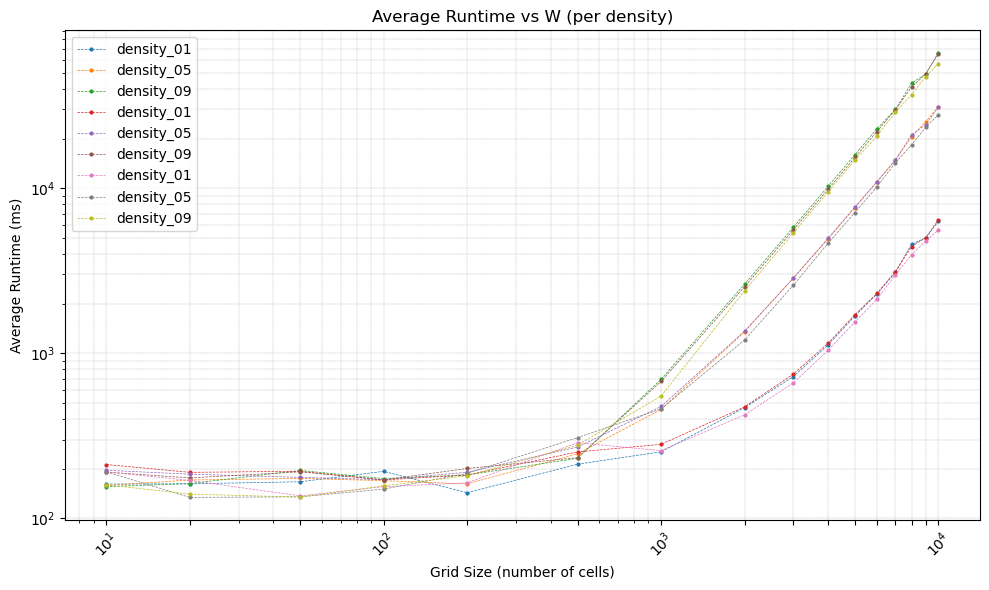

In [3272]:

plt.figure(figsize=(10, 6))

for density, y in avg_vectors128.items():
    plt.plot(W_values, y, marker='o',markersize = 2, linewidth=0.5,linestyle='--', label=density)

for density, y in avg_vectors256.items():
    plt.plot(W_values, y, marker='o',markersize = 2, linewidth=0.5,linestyle='--', label=density)

for density, y in avg_vectors1024.items():
    plt.plot(W_values, y, marker='o',markersize = 2, linewidth=0.5,linestyle='--', label=density)

plt.title("Average Runtime vs W (per density)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.xticks(W_values, rotation=45)
plt.tight_layout()
plt.show()

### T_avg vs Size for density=10%

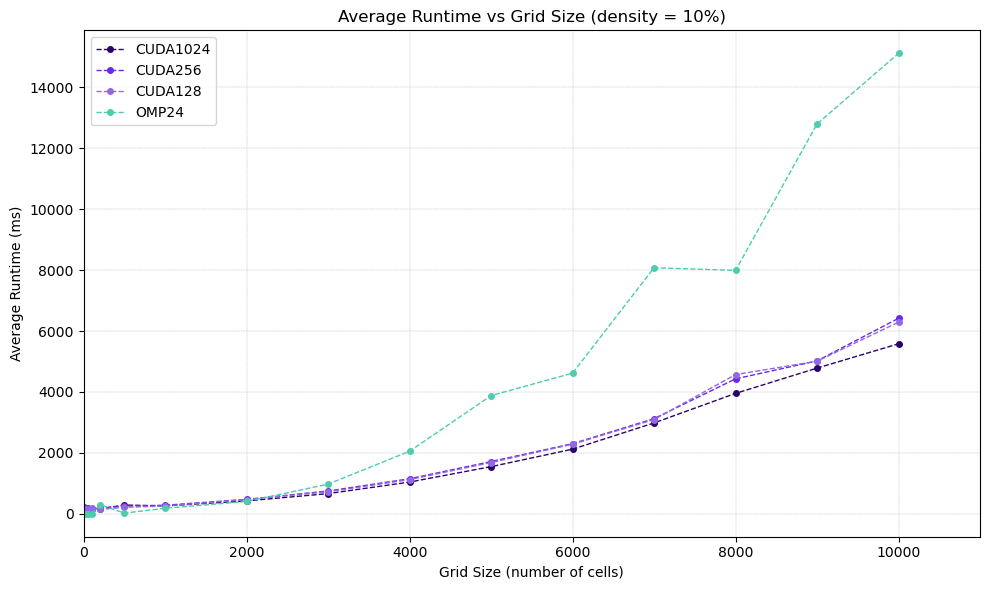

In [3273]:
# Plotting
plt.figure(figsize=(10, 6))
LW = 1
MS = 4

#CUDA
plt.plot(W_values, avg_vectors1024['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA1024', color = '#29056b')
plt.plot(W_values, avg_vectors256['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA256', color = '#6a27e8')
plt.plot(W_values, avg_vectors128['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA128', color = '#9367e6')

#OMP
# plt.plot(W_values, avg_vectors2['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP2', color = '#f7c00a')
# plt.plot(W_values, avg_vectors4['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP4', color = '#fa7305')
# plt.plot(W_values, avg_vectors8['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP8', color = '#f50713')
# plt.plot(W_values, avg_vectors16['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP16', color = '#630308')
plt.plot(W_values, avg_vectors24['density_01'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP24', color = "#4DCCAE")

# SERIAL
# plt.plot(W_values, avg_vectorsSerial['density_01'], marker='o',markersize = MS, linewidth=LW,linestyle='--', label='SERIAL', color = 'green')


# Labels and formatting
plt.title("Average Runtime vs Grid Size (density = 10%)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlim(0,11000)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
#plt.xticks(W_values, rotation=90)
plt.tight_layout()
plt.show()

### T_avg vs Grid Size density 50%

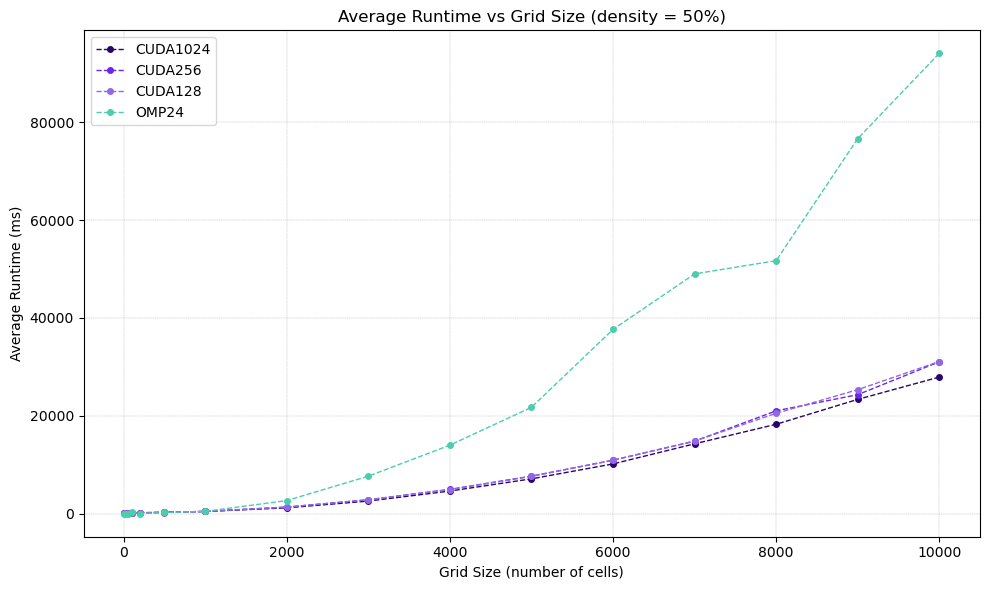

In [3274]:
# Plotting
plt.figure(figsize=(10, 6))
LW = 1
MS = 4

#CUDA
plt.plot(W_values, avg_vectors1024['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA1024', color = '#29056b')
plt.plot(W_values, avg_vectors256['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA256', color = '#6a27e8')
plt.plot(W_values, avg_vectors128['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA128', color = '#9367e6')

# # OMP
# plt.plot(W_values, avg_vectors2['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP2', color = '#f7c00a')
# plt.plot(W_values, avg_vectors4['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP4', color = '#fa7305')
# plt.plot(W_values, avg_vectors8['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP8', color = '#f50713')
# plt.plot(W_values, avg_vectors16['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP16', color = '#630308')
plt.plot(W_values, avg_vectors24['density_05'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP24', color = "#4DCCAE")

#SERIAL
# plt.plot(W_values, avg_vectorsSerial['density_05'], marker='o',markersize = MS, linewidth=LW,linestyle='--', label='SERIAL', color = 'green')

# Labels and formatting
plt.title("Average Runtime vs Grid Size (density = 50%)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
#plt.xticks(W_values, rotation=90)
plt.tight_layout()
plt.show()

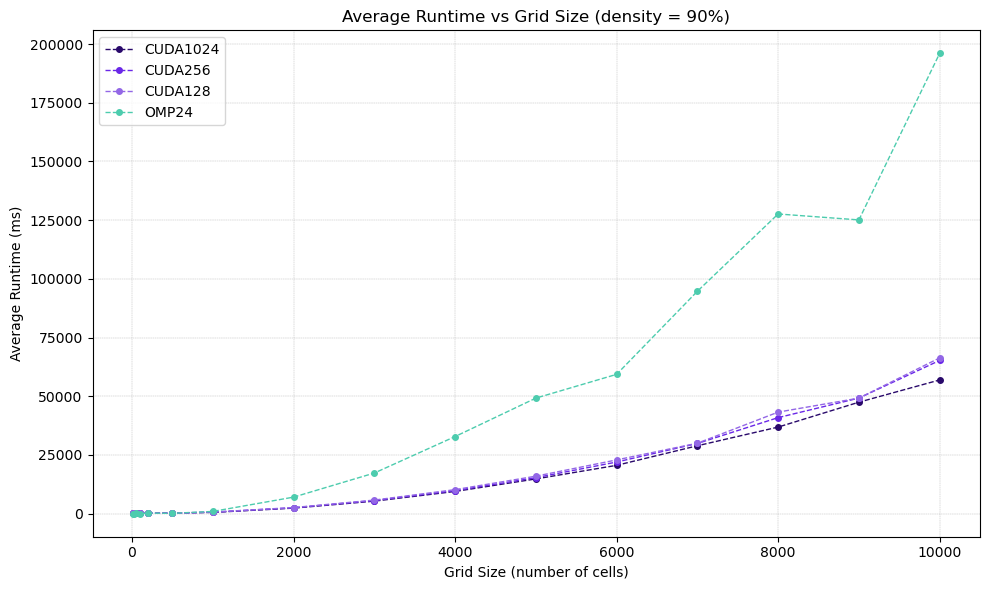

In [3281]:
# Plotting
plt.figure(figsize=(10, 6))
LW = 1
MS = 4

#CUDA
plt.plot(W_values, avg_vectors1024['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA1024', color = '#29096b')
plt.plot(W_values, avg_vectors256['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA256', color = '#6a27e8')
plt.plot(W_values, avg_vectors128['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA128', color = '#9367e6')

# OMP
# plt.plot(W_values, avg_vectors2['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP2', color = '#f7c00a')
# plt.plot(W_values, avg_vectors4['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP4', color = '#fa7309')
# plt.plot(W_values, avg_vectors8['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP8', color = '#f50713')
# plt.plot(W_values, avg_vectors16['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP16', color = '#630308')
plt.plot(W_values, avg_vectors24['density_09'] , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP24', color = "#4DCCAE")


#SERIAL
# plt.plot(W_values, avg_vectorsSerial['density_09'], marker='o',markersize = MS, linewidth=LW,linestyle='--', label='SERIAL', color = 'green')

# Labels and formatting
plt.title("Average Runtime vs Grid Size (density = 90%)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
#plt.xticks(W_values, rotation=90)
plt.tight_layout()
plt.show()

/var/folders/q7/r5v8pd4j4_5883kv409551040000gn/T/ipykernel_63042/2565296832.py:27: RuntimeWarning: divide by zero encountered in divide
  s4 = np_serial / np_4


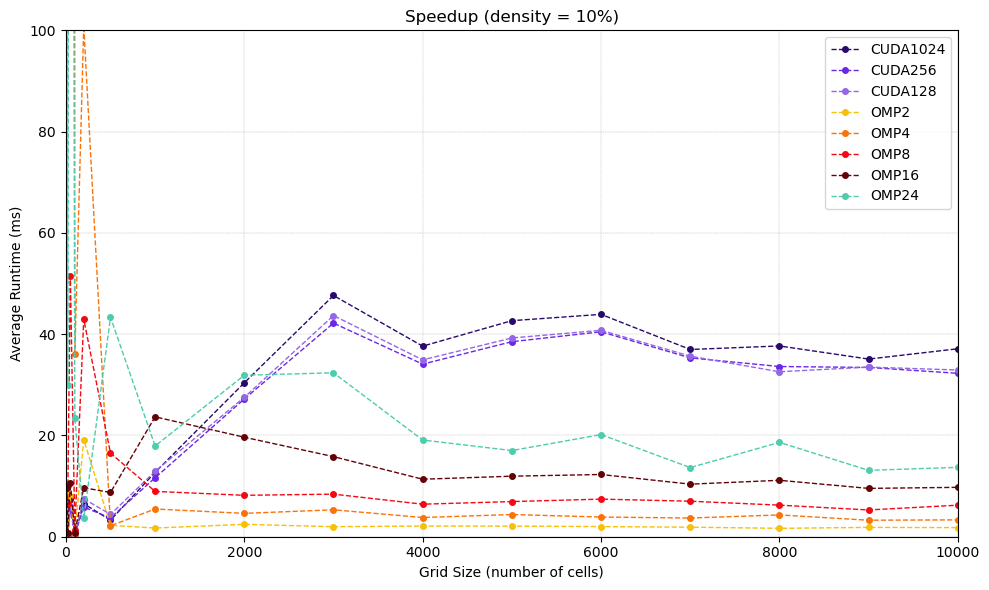

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
LW = 1
MS = 4

np_serial = np.array(avg_vectorsSerial['density_01'])
ss = np_serial / np_serial

np_1024 = np.array(avg_vectors1024['density_01'])
s1024 = np_serial / np_1024

np_256 = np.array(avg_vectors256['density_01'])
s256 = np_serial / np_256

np_128 = np.array(avg_vectors128['density_01'])
s128 = np_serial / np_128

#CUDA
plt.plot(W_values, s1024 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA1024', color = '#29096b')
plt.plot(W_values, s256 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA256', color = '#6a27e8')
plt.plot(W_values, s128 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA128', color = '#9367e6')

np_2 = np.array(avg_vectors2['density_01'])
s2 = np_serial / np_2

np_4 = np.array(avg_vectors4['density_01'])
s4 = np_serial / np_4

np_8 = np.array(avg_vectors8['density_01'])
s8 = np_serial / np_8

np_16 = np.array(avg_vectors16['density_01'])
s16 = np_serial / np_16

np_24 = np.array(avg_vectors24['density_01'])
s24 = np_serial / np_24

# OMP
plt.plot(W_values, s2 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP2', color = '#f7c00a')
plt.plot(W_values, s4 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP4', color = '#fa7309')
plt.plot(W_values, s8 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP8', color = '#f50713')
plt.plot(W_values, s16 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP16', color = '#630308')
plt.plot(W_values, s24 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP24', color = "#4DCCAE")

# #SERIAL
# plt.plot(W_values, ss, marker='o',markersize = MS, linewidth=LW,linestyle='--', label='SERIAL', color = 'green')

# Labels and formatting
plt.title("Speedup (density = 10%)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
plt.xlim(4000,10000)
plt.ylim(0,100)
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
#plt.xticks(W_values, rotation=90)
plt.tight_layout()
plt.show()

/var/folders/q7/r5v8pd4j4_5883kv409551040000gn/T/ipykernel_63042/505807535.py:27: RuntimeWarning: divide by zero encountered in divide
  s4 = np_serial / np_4


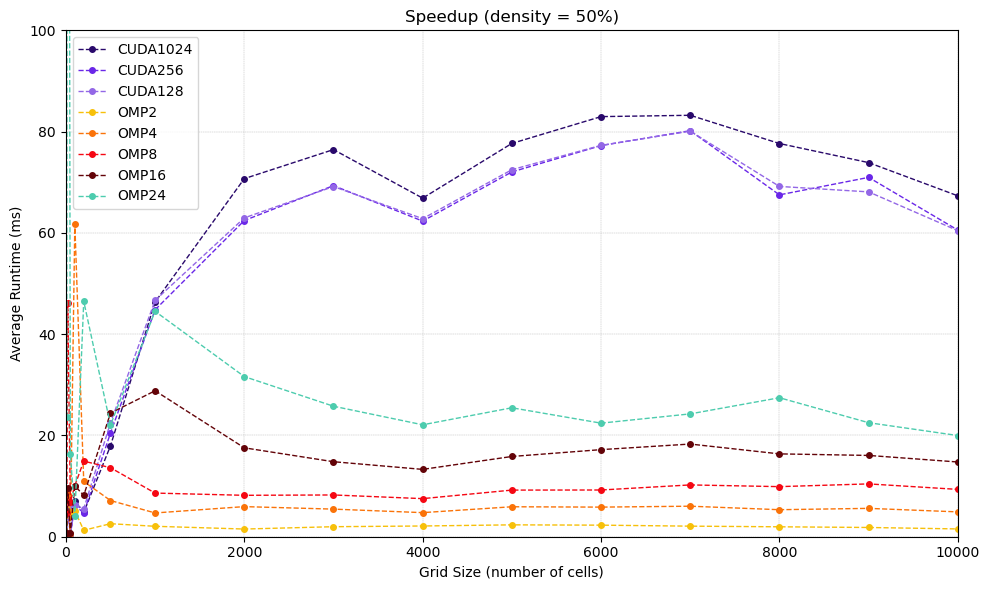

In [3277]:
# Plotting
plt.figure(figsize=(10, 6))
LW = 1
MS = 4

np_serial = np.array(avg_vectorsSerial['density_05'])
ss = np_serial / np_serial

np_1024 = np.array(avg_vectors1024['density_05'])
s1024 = np_serial / np_1024

np_256 = np.array(avg_vectors256['density_05'])
s256 = np_serial / np_256

np_128 = np.array(avg_vectors128['density_05'])
s128 = np_serial / np_128

#CUDA
plt.plot(W_values, s1024 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA1024', color = '#29096b')
plt.plot(W_values, s256 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA256', color = '#6a27e8')
plt.plot(W_values, s128 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA128', color = '#9367e6')

np_2 = np.array(avg_vectors2['density_05'])
s2 = np_serial / np_2

np_4 = np.array(avg_vectors4['density_05'])
s4 = np_serial / np_4

np_8 = np.array(avg_vectors8['density_05'])
s8 = np_serial / np_8

np_16 = np.array(avg_vectors16['density_05'])
s16 = np_serial / np_16

np_24 = np.array(avg_vectors24['density_05'])
s24 = np_serial / np_24

# OMP
plt.plot(W_values, s2 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP2', color = '#f7c00a')
plt.plot(W_values, s4 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP4', color = '#fa7309')
plt.plot(W_values, s8 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP8', color = '#f50713')
plt.plot(W_values, s16 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP16', color = '#630308')
plt.plot(W_values, s24 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP24', color = "#4DCCAE")

# #SERIAL
# plt.plot(W_values, ss, marker='o',markersize = MS, linewidth=LW,linestyle='--', label='SERIAL', color = 'green')

# Labels and formatting
plt.title("Speedup (density = 50%)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
plt.xlim(0,10000)
plt.ylim(0,100)
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
#plt.xticks(W_values, rotation=90)
plt.tight_layout()
plt.show()

/var/folders/q7/r5v8pd4j4_5883kv409551040000gn/T/ipykernel_63042/2064550236.py:27: RuntimeWarning: divide by zero encountered in divide
  s4 = np_serial / np_4


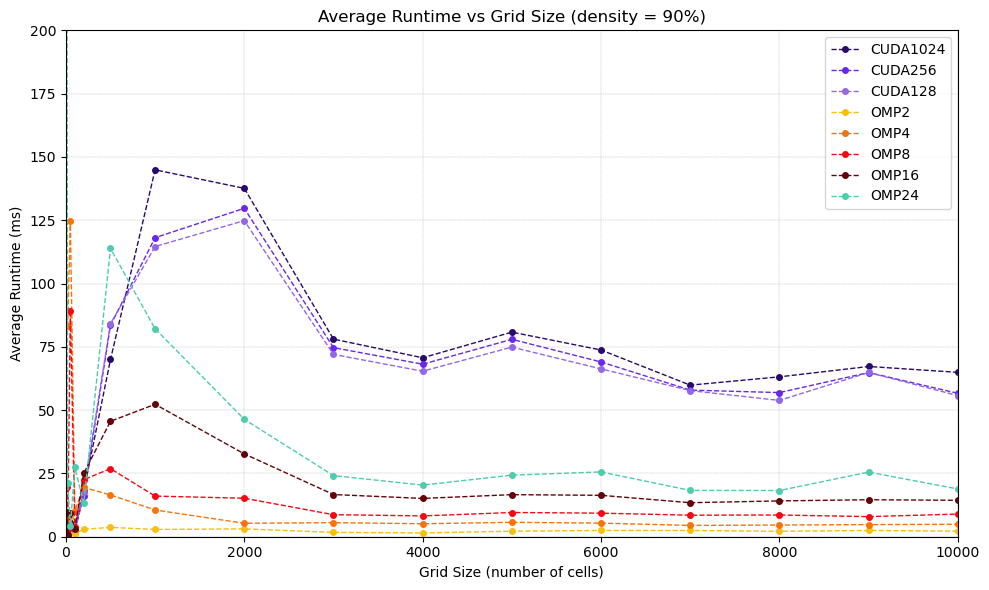

In [3279]:
# Plotting
plt.figure(figsize=(10, 6))
LW = 1
MS = 4

np_serial = np.array(avg_vectorsSerial['density_09'])
ss = np_serial / np_serial

np_1024 = np.array(avg_vectors1024['density_09'])
s1024 = np_serial / np_1024

np_256 = np.array(avg_vectors256['density_09'])
s256 = np_serial / np_256

np_128 = np.array(avg_vectors128['density_09'])
s128 = np_serial / np_128

#CUDA
plt.plot(W_values, s1024 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA1024', color = '#29096b')
plt.plot(W_values, s256 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA256', color = '#6a27e8')
plt.plot(W_values, s128 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='CUDA128', color = '#9367e6')

np_2 = np.array(avg_vectors2['density_09'])
s2 = np_serial / np_2

np_4 = np.array(avg_vectors4['density_09'])
s4 = np_serial / np_4

np_8 = np.array(avg_vectors8['density_09'])
s8 = np_serial / np_8

np_16 = np.array(avg_vectors16['density_09'])
s16 = np_serial / np_16

np_24 = np.array(avg_vectors24['density_09'])
s24 = np_serial / np_24

# OMP
plt.plot(W_values, s2 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP2', color = '#f7c00a')
plt.plot(W_values, s4 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP4', color = '#fa7309')
plt.plot(W_values, s8 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP8', color = '#f50713')
plt.plot(W_values, s16 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP16', color = '#630308')
plt.plot(W_values, s24 , marker='o',markersize = MS, linewidth=LW,linestyle='--', label='OMP24', color = "#4DCCAE")

# #SERIAL
# plt.plot(W_values, ss, marker='o',markersize = MS, linewidth=LW,linestyle='--', label='SERIAL', color = 'green')

# Labels and formatting
plt.title("Average Runtime vs Grid Size (density = 90%)")
plt.xlabel("Grid Size (number of cells)")
plt.ylabel("Average Runtime (ms)")
plt.xlim(0,10000)
plt.ylim(0,200)
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
#plt.xticks(W_values, rotation=90)
plt.tight_layout()
plt.show()